## Teoria de grafos  para el curso de Inteligencia Artificial

### Definiciones 

Un grafo proporciona una forma compacta de representar relaciones binarias entre un conjunto de objetos. Los grafos generalmente se representan gráficamente. Los objetos se representan como círculos u óvalos y las relaciones como líneas o flechas.

![](Grafos.png)

Hay dos tipos básicos de grafos: grafos no dirigidos y grafos dirigidos. 

A continuación, formalizamos las definiciones de grafos dirigidos y no dirigidos. Dado $V$, un conjunto no vacío, una relación binaria $E \subseteq V \times V$ sobre $V$ es un conjunto de pares ordenados, $(V_j, V_k)$, tales que $V_j \in V$ y $V_k \in V$. Un grafo o dígrafo dirigido es un par ordenado, $G = (V, E)$, donde $V$ es un conjunto de vértices o nodos y $E$ es un conjunto de arcos que representan una relación binaria en $V$. Observa el gráfico anterior (b). Los grafos dirigidos representan relaciones antisimétricas entre objetos, por ejemplo, la relación *padre*. 

Un grafo no dirigido es un par ordenado, $G = (V, E)$, donde $V$ es un conjunto de vértices o nodos y $E$ es un conjunto de aristas que representan relaciones binarias simétricas: $(V_j, V_k) \in E \rightarrow (V_k, V_j) \in E$. Los grafos no dirigidos representan relaciones simétricas entre objetos, por ejemplo, la relación *hermano*. bserva el gráfico anterior (a).

Si hay un borde $E_i(V_j, V_k)$ entre los nodos $j$ y $k$, entonces $V_j$ es adyacente a $V_k$. El grado de un nodo es el número de bordes que inciden en ese nodo. En la figura anterior (a), el nodo superior tiene un grado de $2$ y los dos nodos inferiores tienen un grado de $1$. 

Se dice que dos aristas asociadas al mismo par de vértices son aristas paralelas, un borde que incide en un solo vértice es un ciclo y un vértice que no es un punto final de ninguna arista es un vértice aislado y tiene grado $0$. Estos se ilustran en la siguiente figura.

![](Grafos-paralelos-ciclos-aislados.png)

En un grafo dirigido, el número de arcos que apuntan a un nodo es su grado de entrada (*in-degree*) y el número de aristas que apuntan hacia afuera de un nodo es su grado de salida (out-degree). En la figura anterior (b), los dos nodos superiores tienen un grado de entrada de cero y un grado de salida de dos, mientras que los dos nodos inferiores tienen un grado de entrada de dos y un grado de salida de cero. 

Dado un grafo $G = (V, E)$, un subgrafo $G^{'} = (V^{'}, E^{'})$ de $G$, es un grafo tal que $V^{'} \subseteq V$ y $E^{'} \subseteq E$, en el que cada borde en $E^{'}$ incide sobre los vértices de $V$.  Por ejemplo, si eliminamos la dirección de los bordes en el grafo de la figura anterior (b) (se convirte en un grafo no dirigido), entonces el grafo de la figura anterior (a) es un subgrafo de la misma figura (b). 


In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})

### Creando un primer grafo

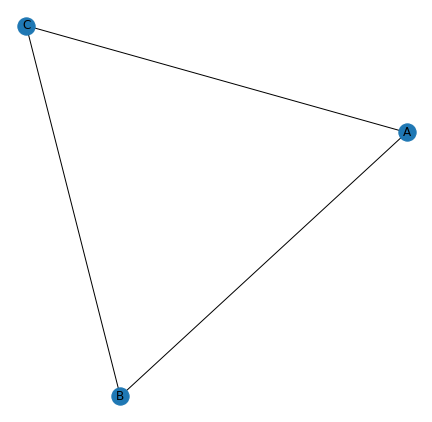

In [3]:
G = nx.Graph()
G.add_node('A')
G.add_nodes_from(['B', 'C'])
G.add_edge('A', 'B')
G.add_edges_from([('B', 'C'), ('A', 'C')])
plt.figure(figsize=(7.5, 7.5))
nx.draw_networkx(G)

### Creación de un grafo a partir de un data frame de pandas

Otra forma de definir un grafo con parámetros de borde es a través de la función `from_pandas_dataframe()`, que nos permite, leer un data frame de datos donde cada fila corresponde a un borde y cada columna adicional a un atributo.

In [4]:
import pandas as pd

df = pd.DataFrame({ 'n1' : [1, 2, 2, 3],
                    'n2' : [2, 3, 4, 4],
                    'color' : ["azul","verde","azul","anaranjado"],
                    'peso' : [1, 2, 3, 4] })
df

,n1,n2,color,peso
0,1,2,azul,1
1,2,3,verde,2
2,2,4,azul,3
3,3,4,anaranjado,4


En base a este data frame, podemos crear un grafo con el color del atributo de borde de la siguiente manera:

In [5]:
G = nx.from_pandas_edgelist(df, 'n1', 'n2', edge_attr=['color'] )
G.edges(data=True)

EdgeDataView([(1, 2, {'color': 'azul'}), (2, 3, {'color': 'verde'}), (2, 4, {'color': 'azul'}), (3, 4, {'color': 'anaranjado'})])

Si quisiéramos agregar todas las columnas de la tabla como atributo de borde, podemos hacerlo especificando `edge_attr = True:`

In [6]:
G = nx.from_pandas_edgelist(df, 'n1', 'n2', edge_attr=True )
G.edges(data=True)

EdgeDataView([(1, 2, {'color': 'azul', 'peso': 1}), (2, 3, {'color': 'verde', 'peso': 2}), (2, 4, {'color': 'azul', 'peso': 3}), (3, 4, {'color': 'anaranjado', 'peso': 4})])

### Agregar bordes y nodos a un grafo existente

Una vez que hemos creado un grafo, podemos agregar bordes y nodos adicionales. Para demostrar esto, comenzamos desde un grafo vacío y subsecuentemente agregamos bordes y nodos. Ten en cuenta que al agregar bordes, los nodos necesarios se agregan automáticamente.

In [7]:
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.edges()

EdgeView([('A', 'B'), ('B', 'C')])

También podemos agregar bordes con atributos adicionales. Ten en cuenta que no es necesario que los bordes ya existentes tengan este atributo establecido de antemano. En el ejempo, agregamos un borde con dos atributos al grafo. Posteriormente, los atributos respectivos aún no existen para los nodos previamente existentes.


In [8]:
G.add_edge('B', 'D', peso=6, signo='+')
G.edges(data=True)

EdgeDataView([('A', 'B', {}), ('B', 'C', {}), ('B', 'D', {'peso': 6, 'signo': '+'})])

Si queremos agregar varios bordes a la vez, podemos usar la función `add_edges_from()`:

In [9]:
G.add_edges_from([('A', 'C'), ('A', 'D')])
G.edges()

EdgeView([('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D')])

También podemos agregar un vértice sin bordes:

In [10]:
print(G.nodes())
G.add_nodes_from(['X', 'Y'])
print(G.nodes())

['A', 'B', 'C', 'D']
['A', 'B', 'C', 'D', 'X', 'Y']


### Visualización

In [11]:
G.add_edges_from([('X', 'B'), ('Y', 'B')])

La forma más básica de trazar es usar la función `nx.draw_networkx()`. Esto dibuja la red tratando de hacer que todos los bordes tengan aproximadamente la misma longitud.

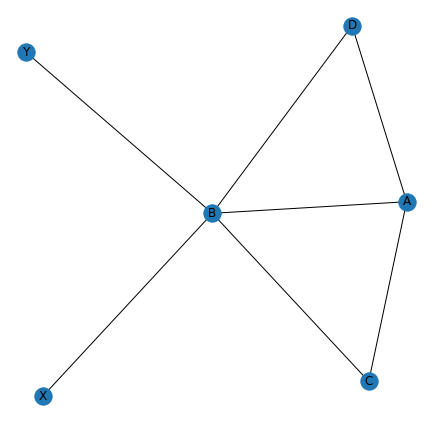

In [12]:
nx.draw_networkx(G)

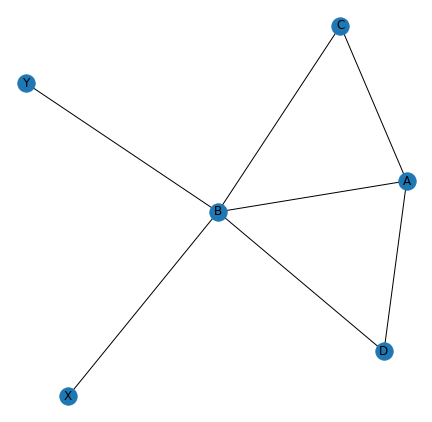

In [13]:
nx.draw_networkx(G)

Ten en cuenta que las posiciones se determinan al azar y cambian cada vez. Si queremos arreglar esas posiciones, podemos pasarlas como parámetros a la función de plotting. Para demostrar esto, primero se usa la función `random_layout()` para producir un diccionario de posiciones  para G:

In [14]:
pos = nx.random_layout(G)
print(pos)

{'A': array([0.6025329, 0.8866764], dtype=float32), 'B': array([0.5618769, 0.4251884], dtype=float32), 'C': array([0.01766642, 0.07126117], dtype=float32), 'D': array([0.94767827, 0.7605239 ], dtype=float32), 'X': array([0.83731794, 0.26924452], dtype=float32), 'Y': array([0.8598499 , 0.27686718], dtype=float32)}


Utilizamos los comandos matplotlib para desactivar el eje.


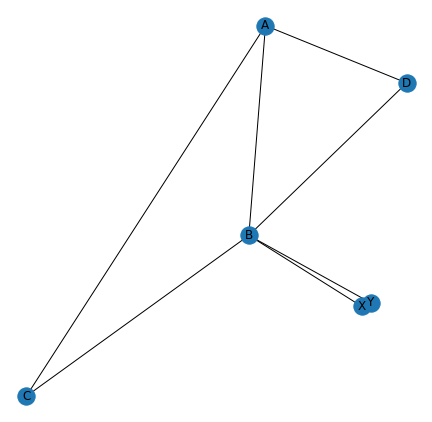

In [15]:
plt.axis('off')
nx.draw_networkx(G, pos)

También podemos dibujar los grafos con un diseño circular. Al usar el diseño circular, podemos usar una relación de aspecto de `1: 1('equal')` para hacer que el grafo parezca "más circular". Ten en cuenta que, en contraste con `draw_networkx()`, `draw_circular()` por defecto no muestra los nombres de los nodos.

Para mostrar los nombres de los nodos, se usa `with_labels = True`. También ten  en cuenta que el comportamiento predeterminado de `draw_circular` es cambiar del eje.

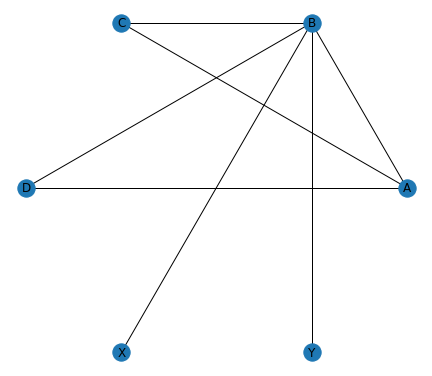

In [16]:
ax = plt.gca()
ax.set_aspect('equal')
nx.draw_circular(G, with_labels=True)

### Tipos de grafos

Además de los dos grafos básicos, dirigidos y no dirigidos, existen otros tipos de grafos, como: 

- Grafo de cadena: un grafo híbrido que tiene bordes dirigidos y no dirigidos. 

- Grafo simple: grafo que no incluye ciclos ni arcos paralelos. 

- Multigrafo: un grafo con varios componentes (subgrafos), de manera que cada componente no tiene bordes con respecto al resto de componentes, es decir, están desconectados. 

- Grafo completo: un grafo que tiene un borde entre cada par de vértices.

- Grafo bipartito: un grafo en el que los vértices se dividen en dos subconjuntos, $G_1$, $G_2$, de modo que todas los bordes conectan un vértice en $G_1$ con un vértice en $G_2$, es decir, no hay bordes entre los nodos de cada subconjunto. 

- Grafo ponderado: grafo que tiene pesos asociados a sus bordes y/o vértices. 

En la figura siguiente se muestran ejemplos de estos tipos de grafos.

![](Tipos-grafos.png)


### Trayectorias y circuitos

Una trayectoria es una secuencia de bordes, $E_1$, $E_2,\dots,E_n$ tal que el vértice final de cada borde coincide con el vértice inicial del borde siguiente en la secuencia (excepto por el vértice final); es decir, $E_i(V_j, V_k), E_{i + 1}(V_k, V_l)$, para $i = 1$ a $i = n -1$. Una trayectoria simple no incluye el mismo borde dos o más veces, una trayectoria elemental no incide en el mismo vértice más de una vez. En la figura siguiente se ilustran ejemplos de diferentes trayectorias. 

![](Trayectorias.png)

En la figura se indica una trayectoria que es simple pero no elemental (a) y una trayectoria simple y elemental (b).

Un grafo $G$ está conectado si hay una trayectoria entre cada par de vértices distintos en $G$. Si un grafo $G$ no está conectado, cada parte que está conectada se llama componente de $G$. Un circuito es una trayectoria tal que el vértice final coincide con el inicial, es decir, es una *trayectoria cerrada*. De forma análoga a las trayectorias, podemos definir circuitos simples y elementales. La figura siguiente muestra un ejemplo de circuito que es simple pero no elemental. 

![](Circuito.png)

Un tipo importante de grafo para el curso es un grafo acíclico dirigido (DAG). Un DAG es un grafo dirigido que no tiene circuitos dirigidos (un circuito dirigido es un circuito en el que todos los bordes de la secuencia siguen las direcciones de las flechas). Por ejemplo, la figura siguiente es un DAG usando networkx:

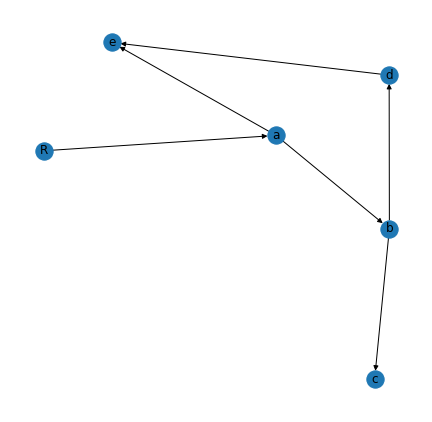

In [17]:
graph = nx.DiGraph()
graph.add_edges_from([("R", "a"), ("a", "b"), ("a", "e"), ("b", "c"), ("b", "d"), ("d", "e")])
nx.draw_networkx(graph)

In [18]:
nx.is_directed_acyclic_graph(graph)

True

#### Multigrafos

Es un grafo que puede almacenar multibordes. Las multibordes son bordes múltiples entre dos nodos. Es diferente del hipergrafo, donde un borde se puede conectar cualquier número de nodos y no solo dos.

En el ejemplo, vemos que si el tipo de grafo no se define correctamente, las funcionalidades, como el cálculo de grados, pueden arrojar un valor incorrecto.

In [19]:
G = nx.MultiGraph()
G.add_nodes_from([1, 2, 3])
G.add_edges_from([(1, 2), (1, 3), (1, 2)])

print(G.degree())
H = nx.Graph()
H.add_nodes_from([1, 2, 3])
H.add_edges_from([(1, 2), (1, 3), (1, 2)])

print(H.degree())


[(1, 3), (2, 2), (3, 1)]
[(1, 2), (2, 1), (3, 1)]


Pandas es una herramienta importante para todo científico de datos, por lo que, naturalmente, sería una buena idea crear un grafo a partir de un data frame  de pandas. Al revés también es posible. 

El siguiente ejemplo muestra cómo crear un multigrafo a partir de un data frame de pandas donde cada borde tiene una propiedad de peso.

In [20]:
df = pd.DataFrame([[1, 1, 4], [2, 1, 5], [3, 2, 6], [1, 1, 3]], columns=['Entrada', 'salida', 'peso'])
print(df)

   Entrada  salida  peso
0        1       1     4
1        2       1     5
2        3       2     6
3        1       1     3


In [21]:
G = nx.from_pandas_edgelist(df, 'Entrada', 'salida', ['peso'], create_using=nx.MultiGraph)

print(nx.info(G))

Name: 
Type: MultiGraph
Number of nodes: 3
Number of edges: 4
Average degree:   2.6667


### Isomorfismo de grafos 

Dos grafos son isomorfos si existe una correspondencia biunívoca entre sus vértices y bordes, de modo que se mantengan las incidencias. Dados dos grafos, $G_1$ y $G_2$, hay tres tipos básicos de isomorfismos:

- Isomorfismo de grafo. Los grafos $G_1$ y $G_2$ son isomorfos.

- Isomorfismo de subgrafo. El grafo $G_1$ es isomorfo a un subgrafo de $G_2$ (o viceversa). 

- Isomorfismo de doble subgrafo. Un subgrafo de $G_1$ es isomorfo a un subgrafo de $G_2$.

La figura siguiente muestra un ejemplo de dos grafos que son isomorfos. 

![](Grafos-isomorfos.png)

Determinar si dos grafos son isomorfos es un problema de NP, mientras que los problemas de isomorfismo de subgrafo y subgrafo doble son NP-completos. 


### Árboles

Los árboles son un tipo de grafo muy importante en la informática en general, y para el curso en particular. Discutiremos dos tipos de árboles: no dirigidos y dirigidos. Un árbol no dirigido es un grafo conectado que no tiene circuitos simples. La figura siguiente muestra un ejemplo de un árbol no dirigido (es más es un árbol no dirigido, que tiene cinco nodos, tres nodos hoja y dos nodos internos). Hay dos clases de vértices o nodos en un árbol no dirigido: (i) nodos de hoja o terminales, con grado uno, (ii) nodos internos, con grado superior a uno. 


![](Arbol-nodirigido.png)

Algunas propiedades básicas de un árbol son: 

* Existe una trayectoria simple entre cada par de vértices. 
 
* El número de vértices, $\vert V\vert$ es igual al número de bordes $\vert E\vert$ más uno: $\vert V\vert = \vert E \vert + 1$. 

* Un árbol con dos o más vértices tiene al menos dos nodos de hojas.

Un árbol dirigido es un grafo dirigido conectado de manera que solo hay una trayectoria dirigida única entre cada par de nodos (también se conoce como un grafo dirigido conectado de forma simple). Hay dos tipos de árboles dirigidos: (i) un árbol con raíz (o simplemente un árbol), (ii) un polytree. Un árbol con raíz tiene un solo nodo con un grado de cero (el nodo raíz) y el resto tiene un grado de uno. Un polytree puede tener más de un nodo con un grado cero (raíces) y ciertos nodos (cero o más) con un grado interno mayor que uno (llamados nodos de padres múltiples). Si quitamos la dirección de los bordes en un polytree, se transforma en un árbol no dirigido. Podemos pensar en un árbol como un caso especial de un polytree. En la figura siguiente se muestra un ejemplo de un árbol con raíz y de un polytree. 

![](Arbol-polytree.png)

Algunas terminologías relevantes para árboles dirigidos son las siguientes. 

- Raíz: un nodo con grado interno igual a cero.
- Hoja: un nodo con un grado de salida igual a cero. 
- Nodo interno: un nodo con un grado de salida mayor que cero.

- Padre/hijo: si hay un arco dirigido de A a B, A es padre de B y B es hijo de A. 

- Hermanos: dos o más nodos son hermanos si tienen el mismo padre. 

- Ascendientes/descendientes: si hay una trayectoria dirigida de A a B, A es un ascendente de B y B es un descendiente de A. 

- Subárbol con raíz A: un subárbol con A como raíz. 

- Subárbol de A: un subárbol con un hijo de A como raíz. 

- Árbol K-ary: un árbol en el que cada nodo interno tiene como máximo $K$ hijos. Es un árbol regular si cada nodo interno tiene $K$ hijos. 

- Árbol binario: un árbol en el que cada nodo interno tiene como máximo dos hijos.

Por ejemplo, en el árbol de la siguiente figura:

![](Arbol-binario.png)

(i) A es un nodo raíz, (ii) C, D, F, G son nodos hoja, (iii) B, E son nodos internos, (iv) A es padre de B y B es hijo de A, (v ) B y C son hermanos, (vi) A es un ascendente de F y F es un descendiente de A, (vii) el subárbol B, D, E, F, G es un subárbol con raíz B, (viii) el subárbol E, F, G es un subárbol de B. El árbol de la figura es un árbol binario no regular. 


In [28]:
# conda install -c anaconda pydot

import networkx as nx

g=nx.DiGraph()
g.add_edges_from([(1,2), (1,3), (1,4), (2,5), (2,6), (2,7), (3,8), (3,9),
                  (4,10), (5,11), (5,12), (6,13)])
p=nx.drawing.nx_pydot.to_pydot(g)
#p.write_png("arbol.png")

FileNotFoundError: [WinError 2] "dot" not found in path.

![](arbol.png)

### Cliques

Un grafo completo es un grafo $G_c$, en el que cada par de nodos es adyacente, es decir, hay un borde entre cada par de nodos. Un conjunto completo, $W_c$ es un subconjunto de $G$ que induce un subgrafo completo de $G$. Esto es un subconjunto de vértices de $G$ de modo que cada par de nodos en este subgrafo es adyacente. Un clique $C$, es un subconjunto de un grafo G tal que es un conjunto completo que es máximo, es decir, no hay otro conjunto completo en G que contenga C. El grafo de la figura siguiente tiene cinco cliques (resaltados), uno con cuatro nodos, uno con tres nodos y tres con dos nodos. Observa que cada nodo en un grafo es parte de al menos un clique, por tanto, el conjunto de cliques de un grafo siempre cubre V. 

![](clique.png)


### Generadores de grafos

Una de las características interesantes y poderosas de Networkx, es el  interfaz del generador de grafos que permite crear varios tipos, solo con una línea de código. Algunos de los grafo son deterministas dado un parámetro (por ejemplo, el grafo completo de k nodos), mientras que algunos son aleatorios (por ejemplo, grafo binomial). 

Presentamos algunos ejemplos de grafos deterministas y aleatorios:

* Grafo completo: crea un grafo con n nodos y un borde entre cada dos nodos.

* Grafo vacío: crea un grafo con n nodos y sin aristas.

* Grafo de estrella: crea un grafo con un nodo central conectado a n nodos externos.


In [ ]:
G = nx.complete_graph(n=9)

print(len(G.edges()), len(G.nodes()))
nx.draw(G)
plt.show()



In [ ]:
H = nx.complete_graph(n=9, create_using=nx.DiGraph)
print(len(H.edges()), len(H.nodes()))

In [ ]:
J = nx.empty_graph(n=9)
print(len(J.edges()), len(J.nodes()))

nx.draw(J)
plt.show()

In [ ]:
K = nx.star_graph(n=9)
print(len(K.edges()), len(K.nodes()))
nx.draw(K)
plt.show()

#### Grafo binomial

Es un grafo con n nodos y cada borde se crea con probabilidad p.

In [ ]:
G1 = nx.binomial_graph(n=9, p=0.5, seed=1)
G2 = nx.binomial_graph(n=9, p=0.5, seed=1)

G3 = nx.binomial_graph(n=9, p=0.5)
print(G1.edges()==G2.edges(), G1.edges()==G3.edges())

In [ ]:
G = nx.random_regular_graph(d=4, n=10)

nx.draw(G)
plt.show()

In [ ]:
T = nx.random_tree(n=10)
nx.draw(T)
plt.show()

### Hipercubos

Una red de $n$-cubos, llamada también hipercubo, consta de $N = 2^n$ nodos. Donde  $n$ se llama la dimensión del hipercubo. Cuando las direcciones del nodo se consideran las esquinas de un cubo n-dimensional, la red conecta cada nodo a sus $n$ vecinos. En un $n$-cubo, los nodos individuales se identifican por direcciones de $n$ bits que van de $0$ a $N-1$. Dado un nodo con la dirección binaria $d$, este nodo está conectado a todos los nodos cuyas direcciones binarias difieren de $d$ en exactamente 1 bit.

In [ ]:
H = nx.hypercube_graph(n = 4)
nx.draw(H)
plt.show()

Revisar: [Graph generators](https://networkx.github.io/documentation/latest/reference/generators.html).

### Características importantes de un grafo

* Excentricidad: para un nodo $n$ en un grafo G, la excentricidad de $n$ es la mayor distancia de camino más corta posible entre $n$ y todos los demás nodos.

* Diámetro: es la distancia más corta máxima entre un par de nodos en un grafo G. Es el mayor valor de excentricidad posible de un nodo.

* Radio: es el valor mínimo de excentricidad de un nodo.

* Periferia: es el conjunto de nodos que tienen su excentricidad igual a su diámetro.

* Centro: El centro de un grafo es el conjunto de nodos cuya excentricidad es igual al radio del grafo.


In [ ]:
G = nx.Graph() 
G.add_edges_from([('A', 'B'), ('A', 'K'), ('B', 'K'), ('A', 'C'),  
                  ('B', 'C'), ('C', 'F'), ('F', 'G'), ('C', 'E'),  
                  ('E', 'F'), ('E', 'D'), ('E', 'H'), ('H', 'I'), ('I', 'J')]) 
  
plt.figure(figsize =(9, 9)) 
nx.draw_networkx(G, with_labels = True) 
  
print("Excentricidad: ", nx.eccentricity(G)) 
print("Diametro: ", nx.diameter(G)) 
print("Radio: ", nx.radius(G)) 
print("Periferia: ", list(nx.periphery(G))) 
print("Centro: ", list(nx.center(G))) 

Networkx proporciona una serie de funciones integradas para verificar las diversas características de conectividad de un grafo, como la conectividad de nodo y borde.

In [ ]:
G = nx.Graph() 
  
G.add_edges_from([('A', 'B'), ('A', 'K'), ('B', 'K'), ('A', 'C'),  
                  ('B', 'C'), ('C', 'F'), ('F', 'G'), ('C', 'E'),  
                  ('E', 'F'), ('E', 'D'), ('E', 'H'), ('I', 'J')]) 
  
nx.draw_networkx(G, with_labels = True) 
  
print(nx.is_connected(G)) 
print(nx.number_connected_components(G)) 
print(list(nx.connected_components(G))) 
  
print(nx.node_connected_component(G, 'I')) 
  
print(nx.node_connectivity(G)) 
  
print(nx.edge_connectivity(G)) 


Referencia: [Python | Clustering, Connectivity and other Graph properties using Networkx.](https://www.geeksforgeeks.org/python-clustering-connectivity-and-other-graph-properties-using-networkx/)

### DFS


In [ ]:
G = nx.Graph() 
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)

G.add_nodes_from([6,7,8,9])

Ahora que hemos agregado todos los nodos, definamos los bordes entre estos nodos.

In [ ]:
G.add_edge(5,8)
G.add_edge(5,4)
G.add_edge(5,7)
G.add_edge(8,2)
G.add_edge(4,3)
G.add_edge(4,1)
G.add_edge(7,6)

G.add_edge(6,9)

Visualización:

In [ ]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

Networkx ofrece una variedad de métodos para recorrer el gráfico de diferentes maneras. Utilizaremos el método `dfs_preorder_nodes()` para analizar el grafo con el método DFS.

El orden esperado debe ser: `5, 8, 2, 4, 3, 1, 7, 6, 9`

Llamemos al método y veamos en qué orden imprime los nodos.

In [ ]:
dfs_ = list(nx.dfs_preorder_nodes(G, source=5))
print(dfs_)

### Ejercicios

* Estudiar por lo menos 3 grafos dados en la documentación de networkx: [Graph generators.](https://networkx.github.io/documentation/stable/reference/generators.html)

* Estudiar por lo menos 3 grafos aleatorios dados en la  documentación de networkx: [Graph generators.](https://networkx.github.io/documentation/stable/reference/generators.html)

* Hacer lo mismo para el caso de grafos dirigidos, incluidos grafos de red en crecimiento(GN) y grafos sin escala.

* Del resultado, analiza las diferencias propiedades de los grafos, como la conectividad de nodo y borde, diamétro.



In [ ]:
p = [0.1, 0.4, 0.6, 0.8]
graphs = [nx.gnp_random_graph(10,i) for i in p]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
ax = axes.flatten()

for i in range(4):
    nx.draw_networkx(graphs[i], ax=ax[i])
    ax[i].set_axis_off()
    ax[i].set_title('Grafos aleatorios con probabilidad {}'.format(p[i]))
    
plt.show()

* Explica el siguiente resultado:

In [ ]:
G_pref = nx.barabasi_albert_graph(n=30, m=2)
nx.draw_circular(G_pref)

* ¿Qué es PAG (Preferential attachment graph)?

* Menciona las diferencias entre los siguientes grafos:


In [ ]:
graphs = [nx.gnp_random_graph(50,0.2), nx.barabasi_albert_graph(n=50, m=2)]
names = ['Grafo aleatorio', 'PAG']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
ax = axes.flatten()
for i in range(2):
    nx.draw_circular(graphs[i], ax=ax[i])
    ax[i].set_axis_off()
    ax[i].set_title(names[i])

plt.show()

* Estudia y resuelve el algoritmo CPP (Chinese Postman Problem) usando networkx.

### Orden perfecto 

Un ordenamiento de los nodos en un grafo consiste en asignar un número entero a cada vértice. Dado un grafo $G =(V, E)$, con $n$ vértices, $\alpha = [V_1, V_2,\dots, Vn]$  es entonces un orden del grafo,  $V_i$ está antes de $V_j$ de acuerdo con este orden, si $i <j$. 

Un orden $\alpha$ de un grafo $G = (V, E)$ es un ordenamiento perfecto si todos los vértices adyacentes de cada vértice $V_i$ que están antes de $Vi$, de acuerdo con ese orden, están completamente conectados. Es decir, para todo $i$, $Adj(V_i) \cup \{V_1, V_2,\dots, V_{i-1}\}$ es un subgrafo completo de $G$. $Adj(V_i)$ es el subconjunto de nodos en $G$ adyacente a $V_i$ . La figura siguiente muestra un ejemplo de ordenación perfecta, donde los nodos tienen un orden perfecto, y el orden de los cliques satisfacen la propiedad de intersección en ejecución.

![](Ordenacion-perfecta.png)


Considera el conjunto de cliques $C_1, C_2, \dots, C_p$ de un grafo conectado no dirigido $G$. De manera análoga al orden de los nodos, podemos definir un orden de cliques, $β = [C_1, C_2,\dots, C_p]$. Un orden $\beta$ de los cliques tiene la propiedad de intersección continua, si todos los nodos comunes de cada clique $C_i$ con los cliques anteriores de acuerdo con este orden están contenidos en un clique $C_j$,  $C_j$ es el padre de $C_i$. En otras palabras, para cada clique $i> 1$ existe un clique $j <i$ tal que $C_i \cap \{C_1, C_2,\dots, C_{i-1}\} \subseteq C_j$. 

Es posible que un clique tenga más de un padre. Los cliques $C_1$, $C_2$ y $C_3$ de la figura anterior tienen un orden perfecto. En este ejemplo, $C_1$ es el padre de $C_2$ y $C_1$ y $C_2$ son los padres de $C_3$. 

un grafo G se triangula si cada circuito simple de longitud mayor que tres en G tiene un acorde. Un acorde es una borde que conecta dos de los vértices del circuito y no forma parte de ese circuito. Por ejemplo, en la figura anterior el circuito formado por los vértices $1$, $2$, $4$, $3$, $1$ tiene un acorde que conecta los nodos $2$ y $3$. El grafo de la figura anterior está triangulado. 

En la figura siguiente se muestra un ejemplo de un grafo que no está triangulado.

![](grafo-no-triangulado.png)

Aunque visualmente este grafo pueda parecer triangulado, hay un circuito $1$, $2$, $5$, $4$, $1$ que no tiene ningún acorde. Una condición para lograr un orden perfecto de los vértices, y tener un orden de los cliques que satisfaga la propiedad de intersección en ejecución, es que el grafo esté triangulado. 